# Clustering KMeans
-  vast majority of data is unlabeled (there is no y for X values)
- Clustering is to group similar instances together into clusters
- It is great tool for data analysis, customer segmentation, recommender systesm, search engines, image segmentation, dim reduction
- Iris data set type of flower is easy to segregate, but if the type of flower is not given, how would you segregate

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris 

# steps 
-  k = 5
-  kmeans = KMeans(n_clusters=k)
-  y_pred = kmeans.fit_predict(X)

In [10]:
iris = load_iris()
iris.data[0:5], iris.target[0:5]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([0, 0, 0, 0, 0]))

In [32]:
# another view of iris dataset
iris = sns.load_dataset('iris') 
print(iris.head(), iris.columns)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [34]:
# we will use iris from sns
iris[0:5]
X = iris.drop(columns = ['species'])
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
# selecting no of clusters
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0) 
    kmeans.fit(X) 
    wcss.append(np.round(kmeans.inertia_)) 
wcss

[681.0, 152.0, 79.0, 57.0, 46.0, 39.0, 34.0, 30.0, 28.0, 26.0]

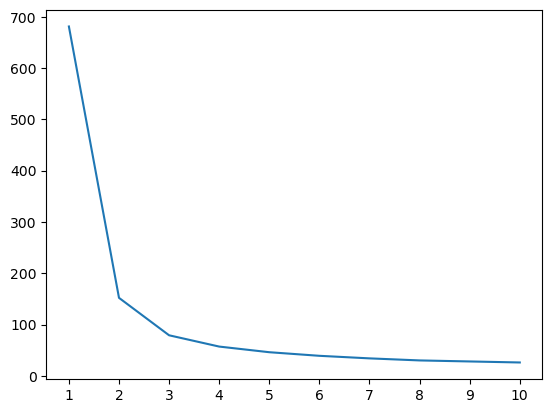

In [36]:
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.show()
#no of k = 3, as per elbow method

In [52]:
# now run the algo on X
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0) 
y_pred = kmeans.fit_predict(X)
y_pred  #labels from clustering

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [53]:
np.unique(y_pred, return_counts=True)

(array([0, 1, 2], dtype=int32), array([62, 50, 38]))

In [38]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [46]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [49]:
iris.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

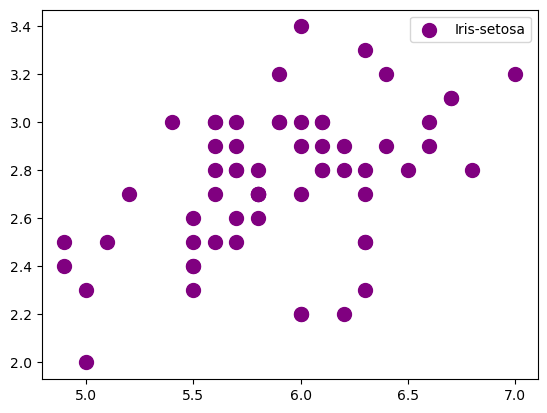

In [54]:
# Visualising the clusters 
cols = iris.columns
plt.scatter(X.loc[y_pred == 0, cols[0]], X.loc[y_pred == 0, cols[1]], s=100, c='purple', label='Iris-setosa')
plt.legend()
plt.show()

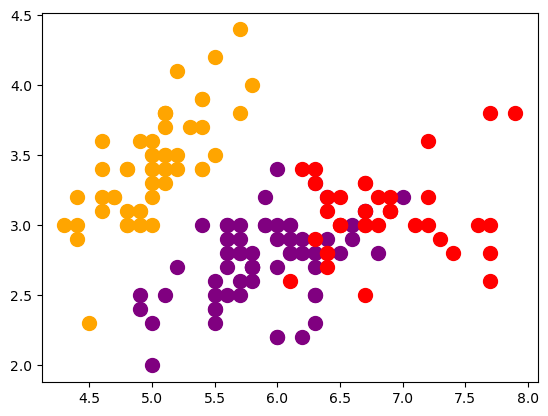

In [56]:
# Visualising the clusters 
cols = iris.columns
plt.scatter(X.loc[y_pred == 0, cols[0]], X.loc[y_pred == 0, cols[1]], s=100, c='purple', label='Iris-setosa')
plt.scatter(X.loc[y_pred == 1, cols[0]], X.loc[y_pred == 1, cols[1]], s=100, c='orange', label='Iris-versicolor')
plt.scatter(X.loc[y_pred == 2, cols[0]], X.loc[y_pred == 2, cols[1]], s=100, c='red', label='Iris-virginica')
plt.show();

In [58]:
y_pred is kmeans.labels_

True

In [59]:
kmeans.inertia_

78.85144142614601

In [60]:
kmeans.score(X)

-78.85144142614601

In [63]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [64]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.5528190123564097